#**Data Preprocessing**


##*Importing Libraries*

In [ ]:
from google.colab import drive
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score

##*Importing the dataset*

In [ ]:
# Mounts Google Drive in Google Colab for file access.

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing the current working directory to the specified location in Google Drive.
%cd '/content/drive/My Drive/group14/classification'


/content/drive/My Drive/group14/classification


###Training data

In [ ]:
# Import necessary libraries


# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels
file_info = [
    {"file_name": "linearlySeparable/class1_train.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "linearlySeparable/class2_train.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1},
    {"file_name": "linearlySeparable/class3_train.txt", "column_names": ["Feature 1", "Feature 2"], "label": 2}
]

# Loop through each file info dictionary
for info in file_info:
    # Extract file information
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    # Read the file contents
    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
train_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
train_df


,Feature 1,Feature 2,Label
0,1.1832,-0.10592,0
1,2.1707,2.12550,0
2,2.6979,4.07620,0
3,2.7904,1.93480,0
4,-1.3176,0.06011,0
...,...,...,...
745,11.1710,-7.95820,2
746,7.7932,-7.29580,2
747,9.8597,-7.36590,2
748,8.6575,-7.50590,2


###Testing data

In [ ]:
# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels for test data
file_info = [
    {"file_name": "linearlySeparable/class1_test.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "linearlySeparable/class2_test.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1},
    {"file_name": "linearlySeparable/class3_test.txt", "column_names": ["Feature 1", "Feature 2"], "label": 2}
]

# Loop through each file info dictionary
for info in file_info:
    # Extract file information
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    # Read the file contents
    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one for test data
test_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame for test data
test_df


,Feature 1,Feature 2,Label
0,-0.3088,-0.84911,0
1,3.2954,0.65072,0
2,-1.2099,0.64561,0
3,1.2495,-1.02660,0
4,-2.2517,-2.09480,0
...,...,...,...
295,10.8190,-8.16680,2
296,10.5550,-6.91180,2
297,15.6950,-6.90470,2
298,10.5830,-10.61500,2


###Validation data

In [ ]:
# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels for validation data
file_info = [
    {"file_name": "linearlySeparable/class1_val.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "linearlySeparable/class2_val.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1},
    {"file_name": "linearlySeparable/class3_val.txt", "column_names": ["Feature 1", "Feature 2"], "label": 2}
]

# Loop through each file info dictionary
for info in file_info:
    # Extract file information
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    # Read the file contents
    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one for validation data
val_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame for validation data
val_df


,Feature 1,Feature 2,Label
0,-3.03420,-3.6446,0
1,1.78910,2.1840,0
2,-2.57020,-1.7020,0
3,2.09970,1.7650,0
4,-0.13436,-1.2447,0
...,...,...,...
445,11.77300,-8.4148,2
446,8.71170,-8.2813,2
447,12.44500,-7.3396,2
448,9.25160,-8.0161,2


###Making dataframes

In [ ]:
# Extract features (X) and labels (y) from the DataFrames for training data
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]

# Extract features (X) and labels (y) from the DataFrames for test data
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Extract features (X) and labels (y) from the DataFrames for validation data
X_validation, y_validation = val_df.iloc[:, :-1], val_df.iloc[:, -1]


##*Plot of the mean of Training data*

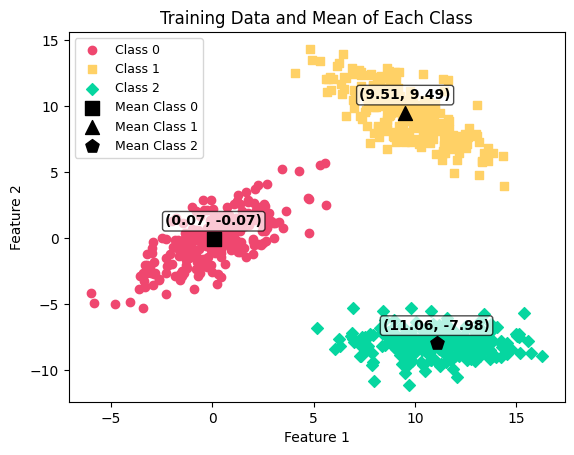

In [ ]:
# Split the data into two classes based on the 'y' value
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
class_2 = X_train[y_train == 2]

# Calculate the mean of each class
mean_class_0 = class_0.mean()
mean_class_1 = class_1.mean()
mean_class_2 = class_2.mean()

# Plot the data and the mean for each class
plt.scatter(class_0['Feature 1'], class_0['Feature 2'], color='#ef476f', label='Class 0', marker='o')
plt.scatter(class_1['Feature 1'], class_1['Feature 2'], color='#ffd166', label='Class 1', marker='s')
plt.scatter(class_2['Feature 1'], class_2['Feature 2'], color='#06d6a0', label='Class 2', marker='D')

plt.scatter(mean_class_0['Feature 1'], mean_class_0['Feature 2'], color='black', marker='s', label='Mean Class 0', s=100)
plt.scatter(mean_class_1['Feature 1'], mean_class_1['Feature 2'], color='black', marker='^', label='Mean Class 1', s=100)
plt.scatter(mean_class_2['Feature 1'], mean_class_2['Feature 2'], color='black', marker='p', label='Mean Class 2', s=100)

plt.annotate(f"({round(mean_class_0['Feature 1'], 2)}, {round(mean_class_0['Feature 2'], 2)})", (round(mean_class_0['Feature 1'], 2), round(mean_class_0['Feature 2'], 2)), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
plt.annotate(f"({round(mean_class_1['Feature 1'], 2)}, {round(mean_class_1['Feature 2'], 2)})", (round(mean_class_1['Feature 1'], 2), round(mean_class_1['Feature 2'], 2)), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
plt.annotate(f"({round(mean_class_2['Feature 1'], 2)}, {round(mean_class_2['Feature 2'], 2)})", (round(mean_class_2['Feature 1'], 2), round(mean_class_2['Feature 2'], 2)), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Mean of Each Class')
plt.legend(fontsize=9)
plt.show()


#**Classifiers**

##*Nearest Neighbour Classifier*

###Model

In [ ]:
# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the validation data
y_validation_pred = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation data
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Calculate precision for every class
precision_per_class = precision_score(y_test, y_test_pred, average=None)

# Calculate mean precision
mean_precision = np.mean(precision_per_class)
print("Precision for each class:")
print(precision_per_class)
print(f"Mean Precision: {mean_precision}")

# Calculate recall for every class
recall_per_class = recall_score(y_test, y_test_pred, average=None)

# Calculate mean recall
mean_recall = np.mean(recall_per_class)
print("\nRecall for each class:")
print(recall_per_class)
print(f"Mean Recall: {mean_recall}")

# Calculate F1-score for every class
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean F1-score
mean_f1_score = np.mean(f1_score_per_class)
print("\nF1-score for each class:")
print(f1_score_per_class)
print(f"Mean F1-score: {mean_f1_score}")

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage):")
print(conf_matrix_percentage)



Test Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Precision for each class:
[1. 1. 1.]
Mean Precision: 1.0

Recall for each class:
[1. 1. 1.]
Mean Recall: 1.0

F1-score for each class:
[1. 1. 1.]
Mean F1-score: 1.0

Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


###Decision Region Plots

In [ ]:
# Define colors for each class

colors = ['#ef476f', '#ffd166', '#06d6a0']
colors_12 = ['#ef476f', '#ffd166']
colors_23 = ['#ffd166', '#06d6a0']
colors_13 = ['#ef476f', '#06d6a0']

# Create a custom colormap
custom_cmap = ListedColormap(colors)
custom_cmap_12 = ListedColormap(colors_12)
custom_cmap_23 = ListedColormap(colors_23)
custom_cmap_13 = ListedColormap(colors_13)

####Pairwise Classes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


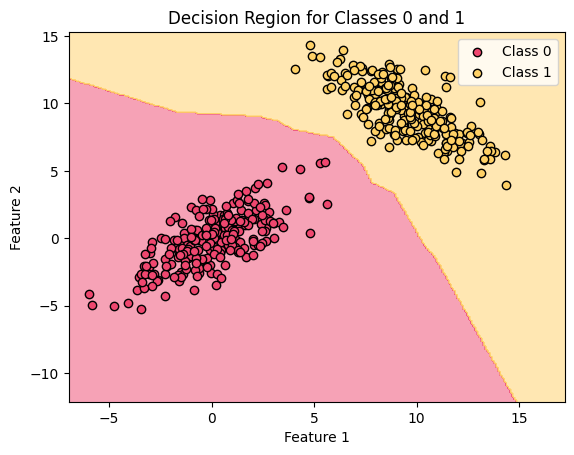

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


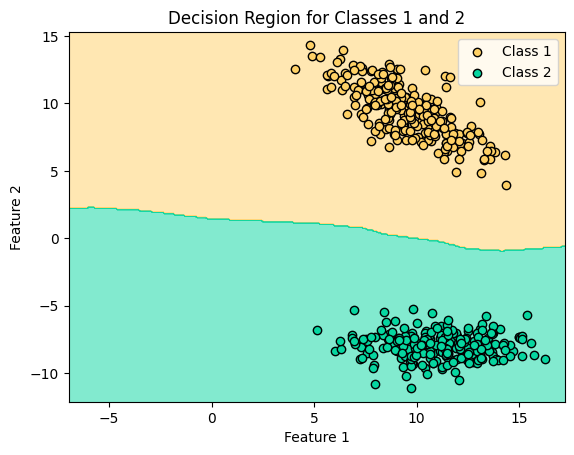

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


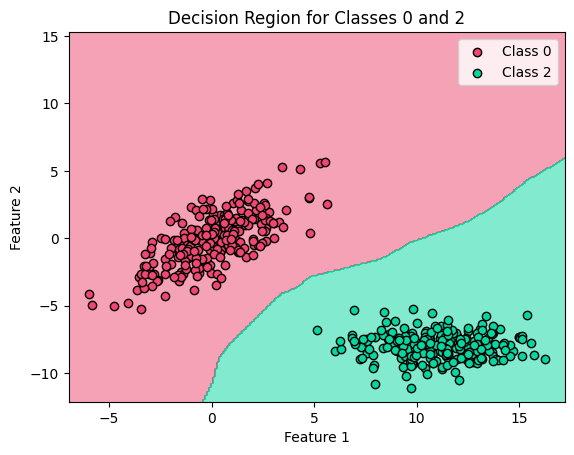

In [ ]:
def plot_decision_region_class1_class2(X_train, y_train, class1, class2):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes
    knn_classifier.fit(X_train[(y_train == class1) | (y_train == class2)],
                       y_train[(y_train == class1) | (y_train == class2)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap for the two classes
    custom_cmap = ListedColormap([colors[class1], colors[class2]])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=colors[class1], edgecolor='k', label=f'Class {class1}')
    scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=colors[class2], edgecolor='k', label=f'Class {class2}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class1, scatter_class2], labels=[f'Class {class1}', f'Class {class2}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class2}')
    plt.show()


def plot_decision_region_class2_class3(X_train, y_train, class2, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes (class2 and class3)
    knn_classifier.fit(X_train[(y_train == class2) | (y_train == class3)],
                       y_train[(y_train == class2) | (y_train == class3)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap with colors for classes 2 and 3
    custom_cmap = ListedColormap(['#ffd166', '#06d6a0'])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0],
                                 (X_train[y_train == class2]).iloc[:, 1],
                                 c='#ffd166', edgecolor='k', label=f'Class {class2}')

    scatter_class3 = plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                                 (X_train[y_train == class3]).iloc[:, 1],
                                 c='#06d6a0', edgecolor='k', label=f'Class {class3}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class2, scatter_class3], labels=[f'Class {class2}', f'Class {class3}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class2} and {class3}')
    plt.show()

def plot_decision_region_class1_class3(X_train, y_train, class1, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes (class1 and class3)
    knn_classifier.fit(X_train[(y_train == class1) | (y_train == class3)],
                       y_train[(y_train == class1) | (y_train == class3)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap with colors for classes 1 and 3
    custom_cmap = ListedColormap(['#ef476f', '#06d6a0'])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0],
                                 (X_train[y_train == class1]).iloc[:, 1],
                                 c='#ef476f', edgecolor='k', label=f'Class {class1}')

    scatter_class3 = plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                                 (X_train[y_train == class3]).iloc[:, 1],
                                 c='#06d6a0', edgecolor='k', label=f'Class {class3}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class1, scatter_class3], labels=[f'Class {class1}', f'Class {class3}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class3}')
    plt.show()

# Call the function for the first pair of classes (e.g., class 0 and class 1)
plot_decision_region_class1_class2(X_train, y_train, class1=0, class2=1)
plot_decision_region_class2_class3(X_train, y_train, class2=1, class3=2)
plot_decision_region_class1_class3(X_train, y_train, class1=0, class3=2)


####All classes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-25-c58f1e6c03c4>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


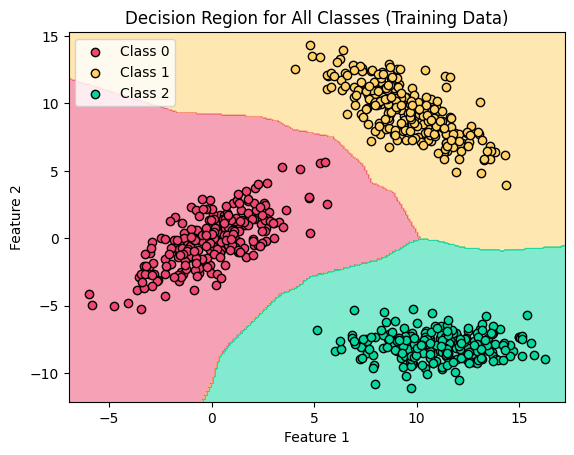

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-25-c58f1e6c03c4>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


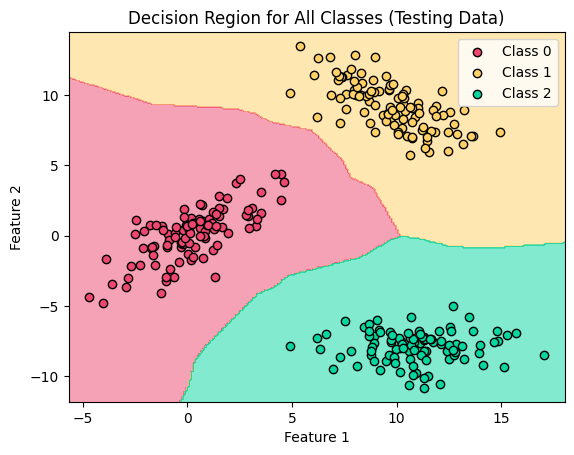

In [ ]:
def plot_decision_region_all_classes(X, y, choice):
    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)
    unique_classes = np.unique(y_train)

    # Plot each class separately with a different label
    for class_label in unique_classes:
        # Filter the points for the current class
        class_points = X[y == class_label]

        # Plot the points for the current class with a label
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],
                    c=custom_cmap(class_label), label=f'Class {class_label}', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if choice:
        plt.title('Decision Region for All Classes (Training Data)')
    else:
        plt.title('Decision Region for All Classes (Testing Data)')
    plt.legend()
    plt.show()

# Call the function to plot decision region for all classes
plot_decision_region_all_classes(X_train, y_train, 1)
plot_decision_region_all_classes(X_test, y_test, 0)

##*K-Nearest Neighbours Classifier*

###Model

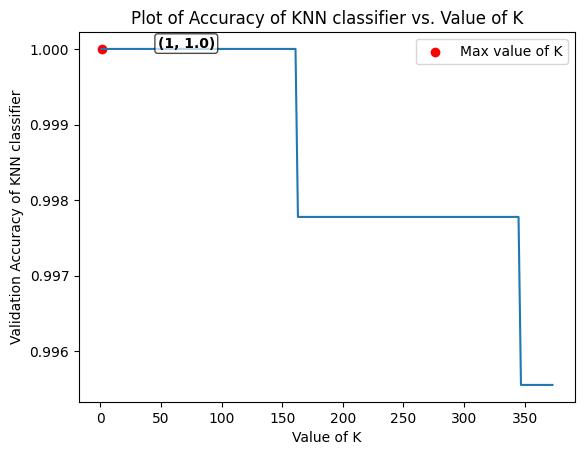

Optimal k: 1
Maximum validation accuracy at this k: 1.0


In [ ]:
acc = []
k = []
no_of_classes = 3
k_val = 0
for i in range(1, len(X_train)//2, 2):
    # Create a k-NN classifier with your chosen k value
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_validation_pred = knn_classifier.predict(X_validation)

    # Calculate accuracy on the validation data
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)
    acc.append(validation_accuracy)
    k.append(i)
# Find the index of the maximum accuracy
max_accuracy_index = acc.index(max(acc))

# Get the value of k for the maximum accuracy
optimal_k = k[max_accuracy_index]
plt.plot(k, acc)
plt.xlabel('Value of K')
plt.ylabel('Validation Accuracy of KNN classifier')
plt.scatter(optimal_k, acc[max_accuracy_index], color='red', marker='o', label='Max value of K')
plt.annotate(f"({optimal_k}, {acc[max_accuracy_index]})",
             xy=(optimal_k, acc[max_accuracy_index]),  # Position of the arrow
             xycoords='data',  # Coordinate system for xy
             textcoords="offset points",
             xytext=(optimal_k+60, acc[max_accuracy_index]-0.025),  # Position of the text (offset from arrow)
             ha='center',
             fontweight='bold',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
plt.title('Plot of Accuracy of KNN classifier vs. Value of K')
plt.legend()
# Display the plot
plt.show()
# find the max here
# Print the optimal k and its corresponding accuracy
print("Optimal k:", optimal_k)
print("Maximum validation accuracy at this k:", acc[max_accuracy_index])

In [ ]:
# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the validation data
y_validation_pred = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation data
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy}")



# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Calculate precision for every class
precision_per_class = precision_score(y_test, y_test_pred, average=None)

# Calculate mean precision
mean_precision = np.mean(precision_per_class)
print("Precision for each class:")
print(precision_per_class)
print(f"Mean Precision: {mean_precision}")

# Calculate recall for every class
recall_per_class = recall_score(y_test, y_test_pred, average=None)

# Calculate mean recall
mean_recall = np.mean(recall_per_class)
print("\nRecall for each class:")
print(recall_per_class)
print(f"Mean Recall: {mean_recall}")

# Calculate F1-score for every class
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean F1-score
mean_f1_score = np.mean(f1_score_per_class)
print("\nF1-score for each class:")
print(f1_score_per_class)
print(f"Mean F1-score: {mean_f1_score}")

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage):")
print(conf_matrix_percentage)


Test Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Precision for each class:
[1. 1. 1.]
Mean Precision: 1.0

Recall for each class:
[1. 1. 1.]
Mean Recall: 1.0

F1-score for each class:
[1. 1. 1.]
Mean F1-score: 1.0

Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


###Decision Region Plots

####Pairwise Classes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


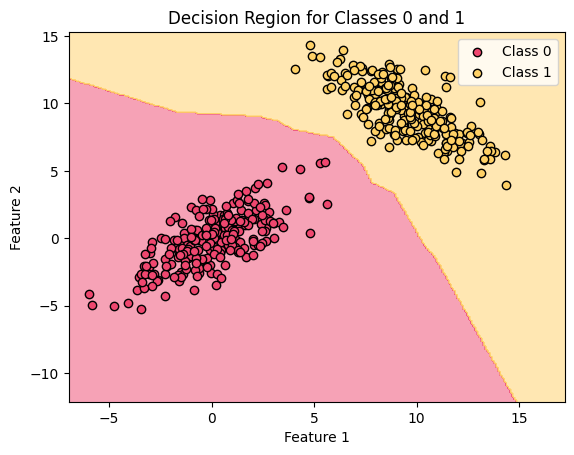

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


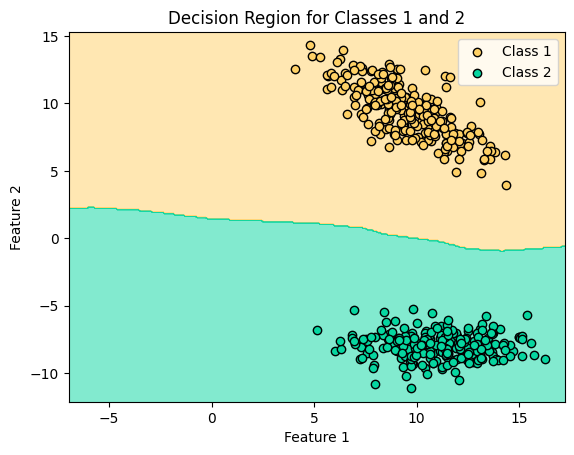

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


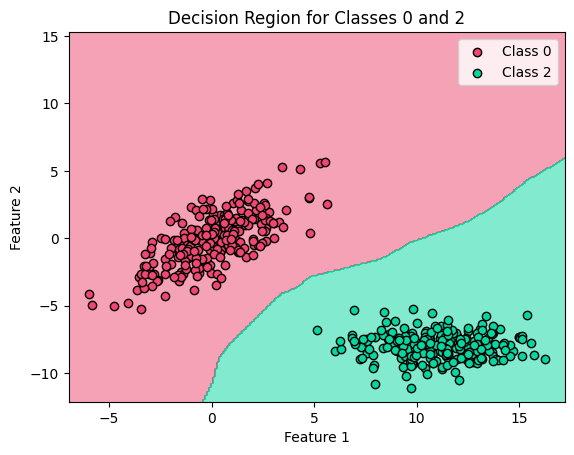

In [ ]:
def plot_decision_region_class1_class2(X_train, y_train, class1, class2):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes
    knn_classifier.fit(X_train[(y_train == class1) | (y_train == class2)],
                       y_train[(y_train == class1) | (y_train == class2)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap for the two classes
    custom_cmap = ListedColormap([colors[class1], colors[class2]])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=colors[class1], edgecolor='k', label=f'Class {class1}')
    scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=colors[class2], edgecolor='k', label=f'Class {class2}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class1, scatter_class2], labels=[f'Class {class1}', f'Class {class2}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class2}')
    plt.show()


def plot_decision_region_class2_class3(X_train, y_train, class2, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes (class2 and class3)
    knn_classifier.fit(X_train[(y_train == class2) | (y_train == class3)],
                       y_train[(y_train == class2) | (y_train == class3)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap with colors for classes 2 and 3
    custom_cmap = ListedColormap(['#ffd166', '#06d6a0'])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0],
                                 (X_train[y_train == class2]).iloc[:, 1],
                                 c='#ffd166', edgecolor='k', label=f'Class {class2}')

    scatter_class3 = plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                                 (X_train[y_train == class3]).iloc[:, 1],
                                 c='#06d6a0', edgecolor='k', label=f'Class {class3}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class2, scatter_class3], labels=[f'Class {class2}', f'Class {class3}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class2} and {class3}')
    plt.show()

def plot_decision_region_class1_class3(X_train, y_train, class1, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Train the classifier on the training data for this pair of classes (class1 and class3)
    knn_classifier.fit(X_train[(y_train == class1) | (y_train == class3)],
                       y_train[(y_train == class1) | (y_train == class3)])

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Create a custom colormap with colors for classes 1 and 3
    custom_cmap = ListedColormap(['#ef476f', '#06d6a0'])

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0],
                                 (X_train[y_train == class1]).iloc[:, 1],
                                 c='#ef476f', edgecolor='k', label=f'Class {class1}')

    scatter_class3 = plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                                 (X_train[y_train == class3]).iloc[:, 1],
                                 c='#06d6a0', edgecolor='k', label=f'Class {class3}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class1, scatter_class3], labels=[f'Class {class1}', f'Class {class3}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class3}')
    plt.show()

# Call the function for the first pair of classes (e.g., class 0 and class 1)
plot_decision_region_class1_class2(X_train, y_train, class1=0, class2=1)
plot_decision_region_class2_class3(X_train, y_train, class2=1, class3=2)
plot_decision_region_class1_class3(X_train, y_train, class1=0, class3=2)


####All Classes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-29-c58f1e6c03c4>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


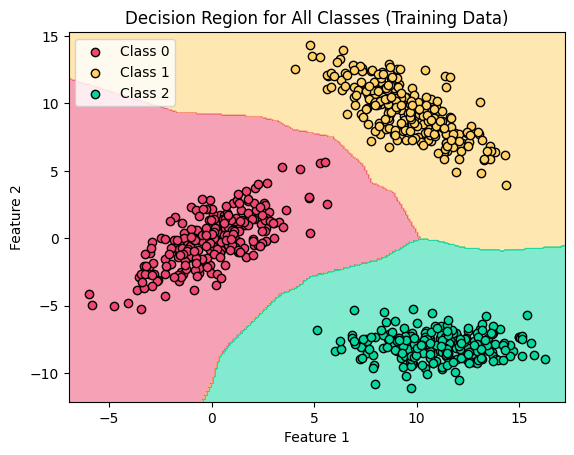

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-29-c58f1e6c03c4>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


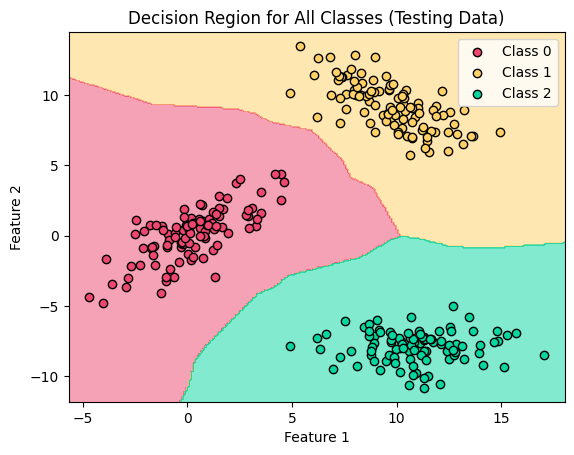

In [ ]:
def plot_decision_region_all_classes(X, y, choice):
    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)
    unique_classes = np.unique(y_train)

    # Plot each class separately with a different label
    for class_label in unique_classes:
        # Filter the points for the current class
        class_points = X[y == class_label]

        # Plot the points for the current class with a label
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],
                    c=custom_cmap(class_label), label=f'Class {class_label}', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if choice:
        plt.title('Decision Region for All Classes (Training Data)')
    else:
        plt.title('Decision Region for All Classes (Testing Data)')
    plt.legend()
    plt.show()

# Call the function to plot decision region for all classes
plot_decision_region_all_classes(X_train, y_train, 1)
plot_decision_region_all_classes(X_test, y_test, 0)

##*Sample Mean Based Classifier*

###Model

In [ ]:
# Convert data to numeric types
def convert_to_numeric(data):
    try:
        return data.astype(float)
    except ValueError:
        # If conversion to float fails, try removing non-numeric rows (e.g., header)
        return data[1:].astype(float)

# Your mean_based_reference_classifier function
def mean_based_reference_classifier(Xtrain, ytrain, new_data_point):
    # Get unique class labels
    unique_classes = np.unique(ytrain)

    # Initialize an empty dictionary to store class reference templates
    reference_templates = {}

    # Create reference templates for each class
    for class_label in unique_classes:
        class_samples = Xtrain[ytrain == class_label]
        mean_template = np.mean(class_samples, axis=0)
        reference_templates[class_label] = mean_template
    min_distance = float('inf')
    predicted_class = None
    for class_label, reference_template in reference_templates.items():
        distance = np.linalg.norm(new_data_point - reference_template)

        if distance < min_distance:
            min_distance = distance
            predicted_class = class_label

    return predicted_class

# Exclude the first row from X_train
Xtrain = X_train.iloc[1:]

# Assuming y_train is also a pandas Series, you can exclude the first row similarly
ytrain = y_train.iloc[1:]

# Step 2: Predict labels on training data
train_predictions = [mean_based_reference_classifier(Xtrain.values, ytrain.values, datapoint) for datapoint in Xtrain.values]

# Step 3: Calculate training accuracy
train_accuracy = accuracy_score(ytrain.values, train_predictions)

# Assuming X_test and y_test have similar structures, you can exclude the first row similarly
Xtest = X_test.iloc[1:]
ytest = y_test.iloc[1:]

# Step 4: Predict labels on test data
test_predictions = [mean_based_reference_classifier(Xtest.values, ytest.values, datapoint) for datapoint in Xtest.values]

# Step 5: Calculate test accuracy
test_accuracy = accuracy_score(ytest.values, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
test_predictions = [mean_based_reference_classifier(Xtest.values, ytest.values, datapoint) for datapoint in Xtest.values]

# Step 5: Calculate test accuracy
test_accuracy = accuracy_score(ytest.values, test_predictions)

# Step 6: Calculate precision for every class
precision_per_class = precision_score(ytest.values, test_predictions, average=None)

# Step 7: Calculate mean precision
mean_precision = np.mean(precision_per_class)

# Step 8: Calculate recall for every class
recall_per_class = recall_score(ytest.values, test_predictions, average=None)

# Step 9: Calculate mean recall
mean_recall = np.mean(recall_per_class)

# Step 10: Calculate F-measure (F1-score) for every class
f1_score_per_class = f1_score(ytest.values, test_predictions, average=None)

# Step 11: Calculate mean F-measure
mean_f1_score = np.mean(f1_score_per_class)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision for Each Class:", precision_per_class)
print("Mean Precision:", mean_precision)
print("Recall for Each Class:", recall_per_class)
print("Mean Recall:", mean_recall)
print("F-measure for Each Class:", f1_score_per_class)
print("Mean F-measure:", mean_f1_score)
# Step 12: Calculate the confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, test_predictions)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

Training Accuracy: 0.9973297730307076
Test Accuracy: 1.0
Training Accuracy: 0.9973297730307076
Test Accuracy: 1.0
Precision for Each Class: [1. 1. 1.]
Mean Precision: 1.0
Recall for Each Class: [1. 1. 1.]
Mean Recall: 1.0
F-measure for Each Class: [1. 1. 1.]
Mean F-measure: 1.0
Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


###Decision Region Plots

####Pairwise Classes

<ipython-input-33-6a71b0d68a7b>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_12(class1), edgecolor='k', label=f'Class {class1}')
<ipython-input-33-6a71b0d68a7b>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_c

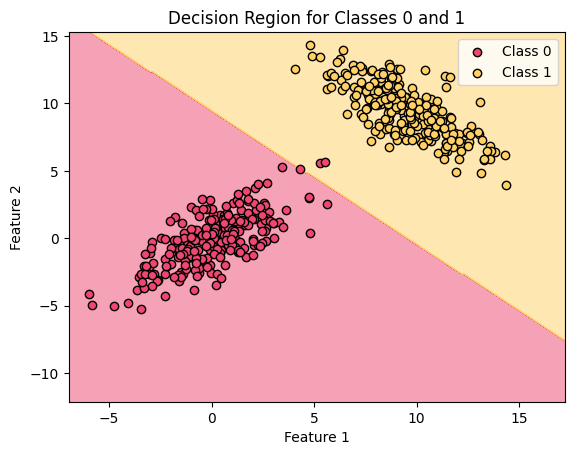

<ipython-input-33-6a71b0d68a7b>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_cmap_12(class2), edgecolor='k', label=f'Class {class2}')
<ipython-input-33-6a71b0d68a7b>:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0], (X_train[y_train == class3]).iloc[:, 1], c=custom_c

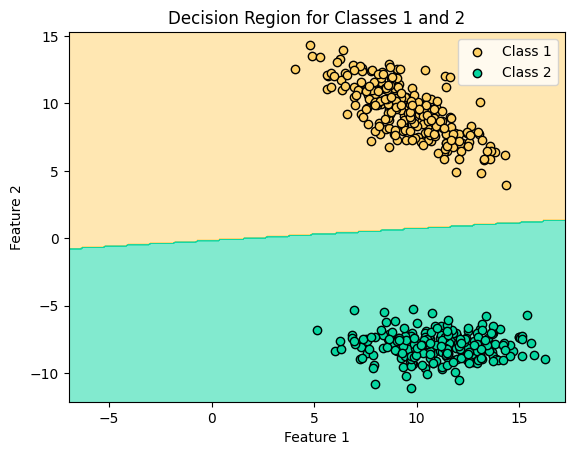

<ipython-input-33-6a71b0d68a7b>:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_13(class1), edgecolor='k', label=f'Class {class1}')
<ipython-input-33-6a71b0d68a7b>:84: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0], (X_train[y_train == class3]).iloc[:, 1], c=custom_c

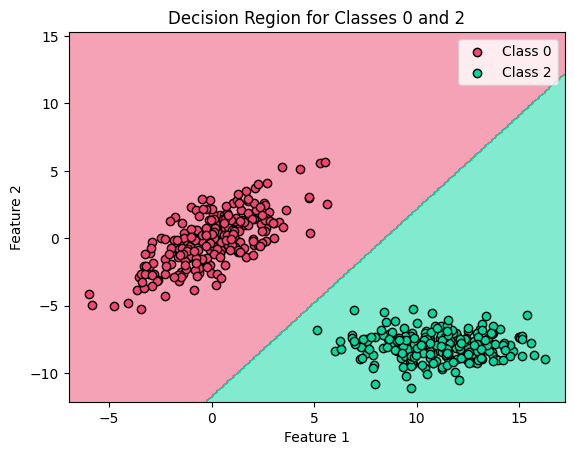

In [ ]:
def plot_decision_region_class1_class2_sample_mean(X_train, y_train, class1, class2):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [mean_based_reference_classifier(X_train[(y_train == class2) | (y_train == class1)].values,
                       y_train[(y_train == class2) | (y_train == class1)].values, datapoint) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_12, alpha=0.5)

    # Plot the data points for classes class1 and class2
    plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_12(class1), edgecolor='k', label=f'Class {class1}')
    plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_cmap_12(class2), edgecolor='k', label=f'Class {class2}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class2}')

    # Set the legend labels
    plt.legend()

    plt.show()




# Define a custom colormap with distinct colors for class2 and class3
# custom_cmap_class2_class3 = ListedColormap(['red', 'blue'])

def plot_decision_region_class2_class3_sample_mean(X_train, y_train, class2, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [mean_based_reference_classifier(X_train[(y_train == class2) | (y_train == class3)].values,
                       y_train[(y_train == class2) | (y_train == class3)].values, datapoint) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary using the custom colormap
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_23, alpha=0.5)

    # Plot the data points for classes class2 and class3 with the custom colormap
    # plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_cmap_23(class2), edgecolor='k', label=f'Class {class2}')
    plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_cmap_12(class2), edgecolor='k', label=f'Class {class2}')
    plt.scatter((X_train[y_train == class3]).iloc[:, 0], (X_train[y_train == class3]).iloc[:, 1], c=custom_cmap_23(class3), edgecolor='k', label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class2} and {class3}')

    # Set the legend labels
    plt.legend()

    plt.show()

def plot_decision_region_class1_class3_sample_mean(X_train, y_train, class1, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [mean_based_reference_classifier(X_train[(y_train == class3) | (y_train == class1)].values,
                       y_train[(y_train == class3) | (y_train == class1)].values, datapoint) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_13, alpha=0.5)

    # Plot the data points for classes class1 and class3
    plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_13(class1), edgecolor='k', label=f'Class {class1}')
    plt.scatter((X_train[y_train == class3]).iloc[:, 0], (X_train[y_train == class3]).iloc[:, 1], c=custom_cmap_13(class3), edgecolor='k', label=f'Class {class3}')
    # scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0],
    #                              (X_train[y_train == class1]).iloc[:, 1],
    #                              c='#ef476f', edgecolor='k', label=f'Class {class1}')

    # scatter_class3 = plt.scatter((X_train[y_train == class3]).iloc[:, 0],
    #                              (X_train[y_train == class3]).iloc[:, 1],
    #                              c='#06d6a0', edgecolor='k', label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class3}')

    # Set the legend labels
    plt.legend()

    plt.show()


# Call the function for the first pair of classes
plot_decision_region_class1_class2_sample_mean(X_train, y_train, class1=0, class2=1)
plot_decision_region_class2_class3_sample_mean(X_train, y_train, class2=1, class3=2)
plot_decision_region_class1_class3_sample_mean(X_train, y_train, class1=0, class3=2)



####All Classes

<ipython-input-34-4e79e957ecc5>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


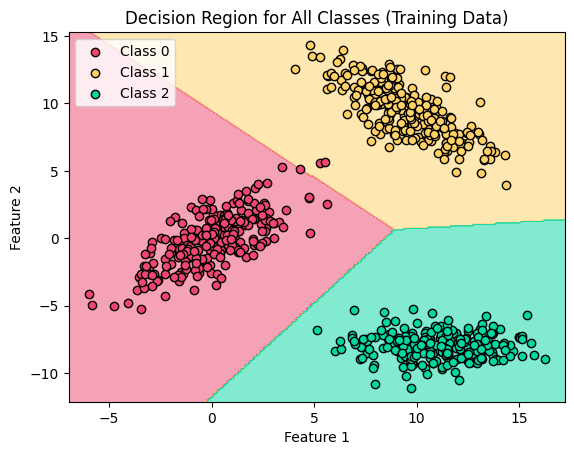

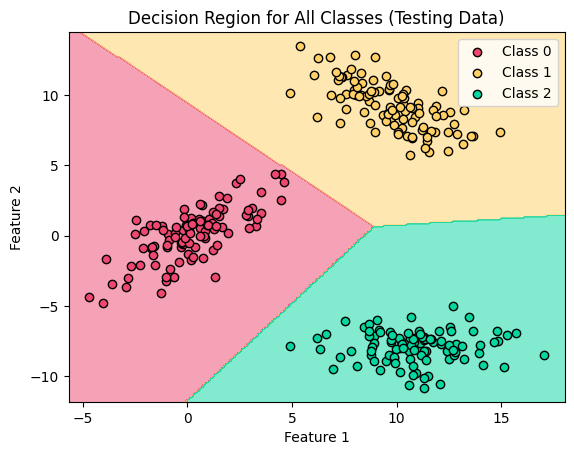

In [ ]:
def plot_decision_region_all_classes_sample_mean(X, y, choice):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [mean_based_reference_classifier(Xtrain.values, ytrain.values, datapoint) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)
    unique_classes = np.unique(y_train)

    # Plot each class separately with a different label
    for class_label in unique_classes:
        # Filter the points for the current class
        class_points = X[y == class_label]

        # Plot the points for the current class with a label
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],
                    c=custom_cmap(class_label), label=f'Class {class_label}', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if choice:
        plt.title('Decision Region for All Classes (Training Data)')
    else:
        plt.title('Decision Region for All Classes (Testing Data)')
    plt.legend()
    plt.show()

# Call the function to plot decision region for all classes
plot_decision_region_all_classes_sample_mean(X_train, y_train, 1)
plot_decision_region_all_classes_sample_mean(X_test, y_test, 0)

##*Sample Mean and Sample Covariance Matrix Based Classifier*

In [ ]:
mean_vectors = {}
cov_matrices = {}
for label in train_df['Label'].unique():
    class_data = X_train[y_train == label]
    mean_vectors[label] = class_data.mean()
    cov_matrices[label] = np.cov(class_data, rowvar=False)

# Define a function to classify a data point using the Mahalanobis distance
def classify_mean_vector(data_point, mean_vectors, cov_matrices):
    class_distances = {}
    for label, mean_vector in mean_vectors.items():
        cov_matrix = cov_matrices[label]
        dist = distance.mahalanobis(data_point, mean_vector, cov_matrix)
        class_distances[label] = dist
    return min(class_distances, key=class_distances.get)

# Create a meshgrid for the decision boundary visualization
x_min, x_max = X_train['Feature 1'].min() - 1, X_train['Feature 1'].max() + 1
y_min, y_max = X_train['Feature 2'].min() - 1, X_train['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.08),
                     np.arange(y_min, y_max, 0.08))

# Initialize lists to store predictions for df_test and df_val
y_test_pred = []
y_val_pred = []

# Initialize a matrix for decision boundary visualization
decision_boundary_matrix = np.zeros(xx.shape)

# Classify data points in df_test and populate the decision boundary matrix
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        data_point = np.array([xx[i, j], yy[i, j]])
        predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
        decision_boundary_matrix[i, j] = predicted_class

# Classify data points in df_test and df_val
for _, row in X_test.iterrows():
    data_point = row.values
    predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
    y_test_pred.append(predicted_class)

for _, row in X_validation.iterrows():
    data_point = row.values
    predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
    y_val_pred.append(predicted_class)

# Convert the predictions to NumPy arrays
y_test_pred = np.array(y_test_pred)
y_val_pred = np.array(y_val_pred)

# Calculate accuracy for df_test and df_val
accuracy_test = (y_test_pred == y_test).mean()
accuracy_val = (y_val_pred == y_validation).mean()

print("Test accuracy: ", accuracy_test)
print("Validation accuracy: ", accuracy_val)

# Calculate precision, recall, and F1-score for every class on the test data
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1_score = np.mean(f1_score_per_class)

print("\nPrecision for each class (Test Data):", precision_per_class)
print("Mean Precision (Test Data):", mean_precision)
print("\nRecall for each class (Test Data):", recall_per_class)
print("Mean Recall (Test Data):", mean_recall)
print("\nF1-score for each class (Test Data):", f1_score_per_class)
print("Mean F1-score (Test Data):", mean_f1_score)

# Calculate confusion matrix for test data in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage) for Test Data:")
print(conf_matrix_percentage)

Test accuracy:  0.97
Validation accuracy:  0.9711111111111111

Precision for each class (Test Data): [0.97894737 0.93457944 1.        ]
Mean Precision (Test Data): 0.9711756025577963

Recall for each class (Test Data): [0.93 1.   0.98]
Mean Recall (Test Data): 0.9700000000000001

F1-score for each class (Test Data): [0.95384615 0.96618357 0.98989899]
Mean F1-score (Test Data): 0.969976239541457

Confusion Matrix (in percentage) for Test Data:
[[ 93.   7.   0.]
 [  0. 100.   0.]
 [  2.   0.  98.]]


###Decision boundary plots

####Pairwise Classes

<ipython-input-36-0a0b0d43634a>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_12(0), edgecolor='k', label=f'Class {class1}')
<ipython-input-36-0a0b0d43634a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == cl

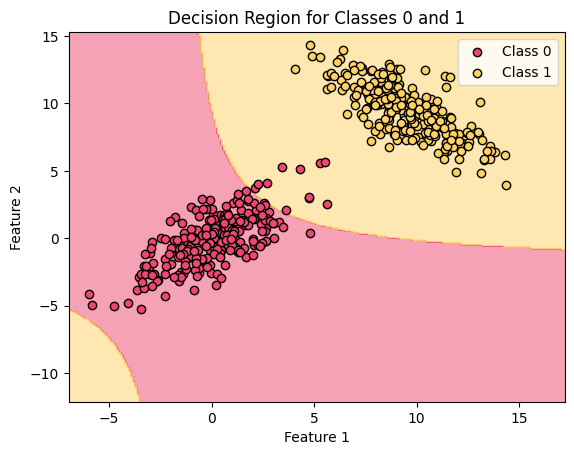

<ipython-input-36-0a0b0d43634a>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0],
<ipython-input-36-0a0b0d43634a>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


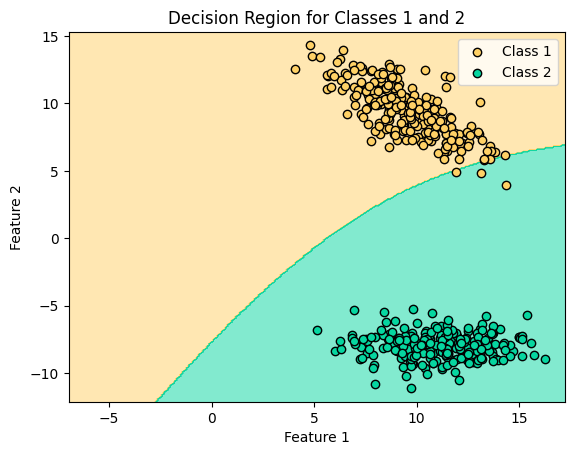

<ipython-input-36-0a0b0d43634a>:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0],
<ipython-input-36-0a0b0d43634a>:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


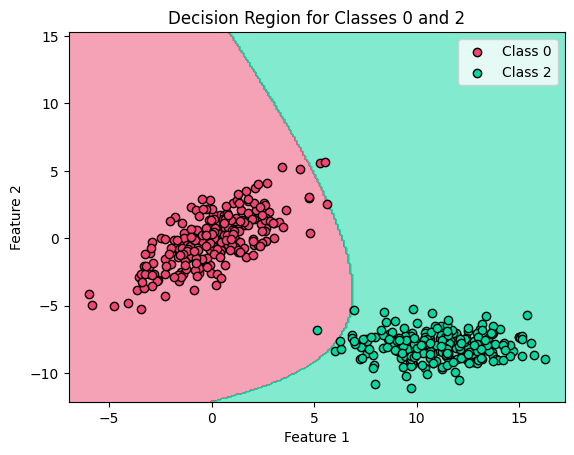

In [ ]:
def plot_decision_region_class1_class2_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class1, class2):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    keys_to_extract = [class1, class2]  # Extract only the class labels we're interested in
    mean_vect_pair = {key: mean_vectors[key] for key in keys_to_extract}
    cov_pair = {key: cov_matrices[key] for key in keys_to_extract}
    mesh_labels = [classify_mean_vector(datapoint, mean_vect_pair, cov_pair) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_12, alpha=0.5)

    # Scatter plot for classes with edge color
    scatter_class1 = plt.scatter((X_train[y_train == class1]).iloc[:, 0], (X_train[y_train == class1]).iloc[:, 1], c=custom_cmap_12(0), edgecolor='k', label=f'Class {class1}')
    scatter_class2 = plt.scatter((X_train[y_train == class2]).iloc[:, 0], (X_train[y_train == class2]).iloc[:, 1], c=custom_cmap_12(1), edgecolor='k', label=f'Class {class2}')

    # Explicitly define legend labels for scatter plots
    plt.legend(handles=[scatter_class1, scatter_class2], labels=[f'Class {class1}', f'Class {class2}'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class2}')
    plt.show()

def plot_decision_region_class2_class3_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class2, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    keys_to_extract = [1, 2]
    mean_vect_23 = {key: mean_vectors[key] for key in keys_to_extract}
    cov_23 = {key: cov_matrices[key] for key in keys_to_extract}
    mesh_labels = [classify_mean_vector(datapoint, mean_vect_23, cov_23) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_23, alpha=0.5)
    plt.scatter((X_train[y_train == class2]).iloc[:, 0],
                (X_train[y_train == class2]).iloc[:, 1],
                c=custom_cmap_23(0), edgecolor='k',
                label=f'Class {class2}')
    plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                (X_train[y_train == class3]).iloc[:, 1],
                c=custom_cmap_23(1), edgecolor='k',
                label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class2} and {class3}')
    plt.legend()
    plt.show()


def plot_decision_region_class1_class3_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class1, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    keys_to_extract = [0, 2]
    mean_vect_13 = {key: mean_vectors[key] for key in keys_to_extract}
    cov_13 = {key: cov_matrices[key] for key in keys_to_extract}
    mesh_labels = [classify_mean_vector(datapoint, mean_vect_13, cov_13) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_13, alpha=0.5)
    plt.scatter((X_train[y_train == class1]).iloc[:, 0],
                (X_train[y_train == class1]).iloc[:, 1],
                c=custom_cmap_13(0), edgecolor='k',
                label=f'Class {class1}')
    plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                (X_train[y_train == class3]).iloc[:, 1],
                c=custom_cmap_13(1), edgecolor='k',
                label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class3}')
    plt.legend()
    plt.show()



plot_decision_region_class1_class2_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class1=0, class2=1)
plot_decision_region_class2_class3_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class2=1, class3=2)
plot_decision_region_class1_class3_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, class1=0, class3=2)

####All Classes

<ipython-input-37-d9f68991f321>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


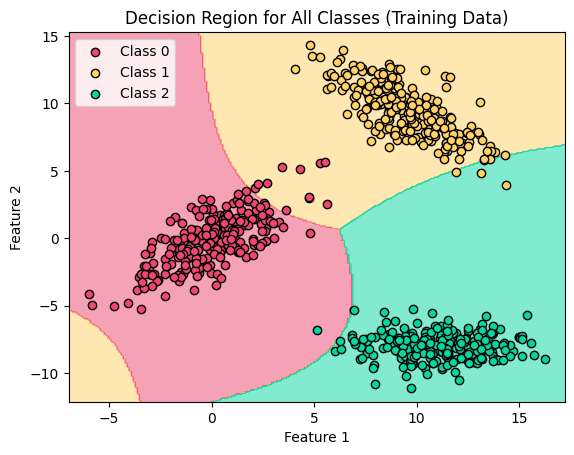

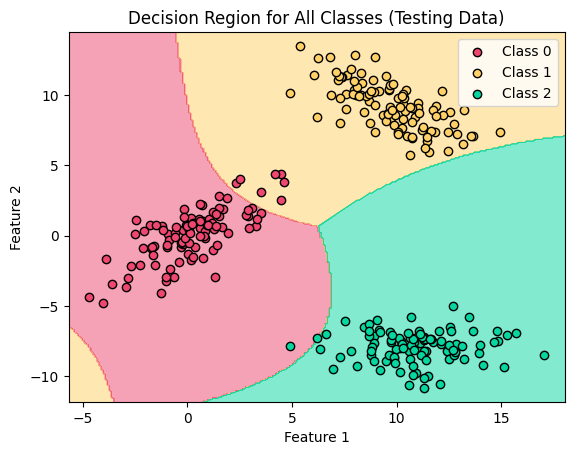

In [ ]:
def plot_decision_region_all_classes_sample_mean_cov(X, y, mean_vectors, cov_matrices, choice):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid using mean-based classification
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [classify_mean_vector(datapoint, mean_vectors, cov_matrices) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)
    unique_classes = np.unique(y)

    # Plot each class separately with a different label
    for class_label in unique_classes:
        # Filter the points for the current class
        class_points = X[y == class_label]

        # Plot the points for the current class with a label
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],
                    c=custom_cmap(class_label), label=f'Class {class_label}', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if choice:
        plt.title('Decision Region for All Classes (Training Data)')
    else:
        plt.title('Decision Region for All Classes (Testing Data)')
    plt.legend()
    plt.show()

# Call the function to plot decision region for all classes
plot_decision_region_all_classes_sample_mean_cov(X_train, y_train, mean_vectors, cov_matrices, True)
plot_decision_region_all_classes_sample_mean_cov(X_test, y_test, mean_vectors, cov_matrices, False)

##**Bayesian Classifier-Unimodal Gaussian Density<br><br>**

###Case 1 - Covariance matrix for all classes is same and is σ²I

####Model

In [ ]:
var = (cov_matrices[0][0][0]+cov_matrices[1][0][0]+cov_matrices[0][1][1]+cov_matrices[1][1][1]+cov_matrices[2][0][0]+cov_matrices[2][1][1])/6
cov_mat = [[var, 0], [0, var]]

# Calculate mean and covariance matrix for each class
mean_class_1 = [mean_vectors[0][0], mean_vectors[0][1]]
covariance_class_1 = cov_mat

mean_class_2 = [mean_vectors[1][0], mean_vectors[1][1]]
covariance_class_2 = cov_mat

mean_class_3 = [mean_vectors[2][0], mean_vectors[2][1]]
covariance_class_3 = cov_mat

# Define the Multivariate Gaussian Density Function
def gaussian_density(x, mean, covariance):
    return multivariate_normal.pdf(x, mean=mean, cov=covariance)

# Bayes classifier using Multivariate Gaussian densities
def bayes_classifier(x, mean1, covariance1, mean2, covariance2, mean3, covariance3):
    likelihood_class_1 = gaussian_density(x, mean1, covariance1)
    likelihood_class_2 = gaussian_density(x, mean2, covariance2)
    likelihood_class_3 = gaussian_density(x, mean3, covariance3)

    if likelihood_class_1 > likelihood_class_2 and likelihood_class_1 > likelihood_class_3:
        return 0  # Class 1
    elif likelihood_class_2 > likelihood_class_1 and likelihood_class_2 > likelihood_class_3:
        return 1  # Class 2
    else:
        return 2  # Class 3

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2, mean_class_3, covariance_class_3) for x in Xtest.values]

accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

def pairwise_bayes_classifier(x, mean1, covariance1, mean2, covariance2):
    likelihood_class_1 = gaussian_density(x, mean1, covariance1)
    likelihood_class_2 = gaussian_density(x, mean2, covariance2)

    if likelihood_class_1 > likelihood_class_2:
        return 0  # Class 1
    else:
        return 1  # Class 2

Test Accuracy: 1.0
Precision per class: [1. 1. 1.]
Recall per class: [1. 1. 1.]
F1-score per class: [1. 1. 1.]
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0
Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


####Decision Boundary Plots

#####Pairwise Classes

<ipython-input-39-240a514f258b>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0],
<ipython-input-39-240a514f258b>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0],


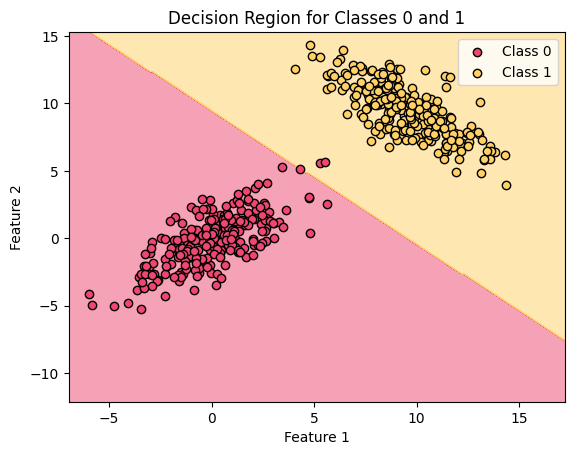

<ipython-input-39-240a514f258b>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0],
<ipython-input-39-240a514f258b>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


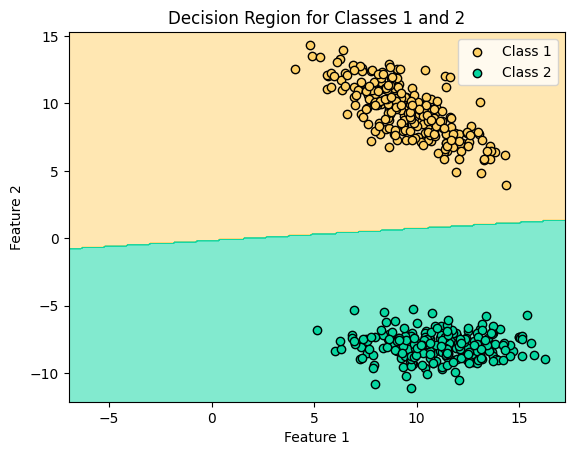

<ipython-input-39-240a514f258b>:90: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0],
<ipython-input-39-240a514f258b>:95: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


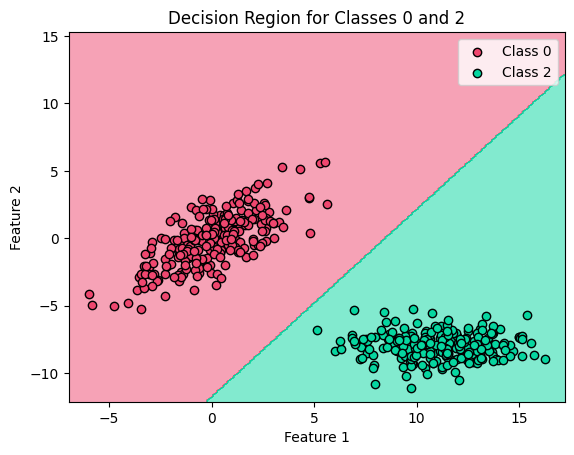

<ipython-input-39-240a514f258b>:144: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


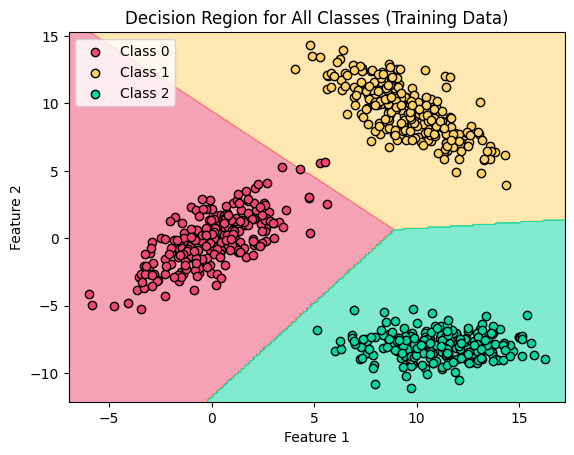

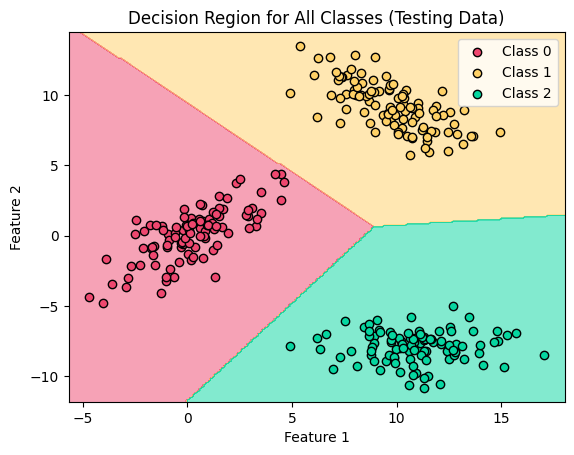

In [ ]:
def plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_matrices, class1, class2):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [pairwise_bayes_classifier(datapoint, mean_vectors[0], cov_matrices[0], mean_vectors[1], cov_matrices[1]) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_12, alpha=0.5)

    # Plot the data points for classes class1 and class2 with a label
    plt.scatter((X_train[y_train == class1]).iloc[:, 0],
                (X_train[y_train == class1]).iloc[:, 1],
                c=custom_cmap_12(class1), edgecolor='k',
                label=f'Class {class1}')

    plt.scatter((X_train[y_train == class2]).iloc[:, 0],
                (X_train[y_train == class2]).iloc[:, 1],
                c=custom_cmap_12(class2), edgecolor='k',
                label=f'Class {class2}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class2}')

    # Set the legend labels and display the legend
    plt.legend()

    plt.show()

def plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_matrices, class2, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [pairwise_bayes_classifier(datapoint, mean_vectors[1], cov_matrices[1], mean_vectors[2], cov_matrices[2]) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Define custom colormaps for class2 and class3
    custom_cmap_class2 = plt.cm.Paired(class2)
    custom_cmap_class3 = plt.cm.Paired(class3)

    # Plot the decision boundary using the mesh_labels
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_23, alpha=0.5)

    # Plot the data points for class2 and class3 with separate colormaps
    plt.scatter((X_train[y_train == class2]).iloc[:, 0],
                (X_train[y_train == class2]).iloc[:, 1],
                c=custom_cmap_12(class2), edgecolor='k',
                label=f'Class {class2}')

    plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                (X_train[y_train == class3]).iloc[:, 1],
                c=custom_cmap_13(class3), edgecolor='k',
                label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class2} and {class3}')

    # Set the legend labels and display the legend
    plt.legend()

    plt.show()



def plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_matrices, class1, class3):
    # Create a mesh grid of points that covers your feature space
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [pairwise_bayes_classifier(datapoint, mean_vectors[0], cov_matrices[0], mean_vectors[2], cov_matrices[2]) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap_13, alpha=0.5)

    # Plot the data points for classes class1 and class3 with a label
    plt.scatter((X_train[y_train == class1]).iloc[:, 0],
                (X_train[y_train == class1]).iloc[:, 1],
                c=custom_cmap_13(class1), edgecolor='k',
                label=f'Class {class1}')

    plt.scatter((X_train[y_train == class3]).iloc[:, 0],
                (X_train[y_train == class3]).iloc[:, 1],
                c=custom_cmap_13(class3), edgecolor='k',
                label=f'Class {class3}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region for Classes {class1} and {class3}')

    # Set the legend labels and display the legend
    plt.legend()

    plt.show()


covariance_class_1 = cov_mat
covariance_class_2 = cov_mat
covariance_class_3 = cov_mat
cov_mat_0 = {
    0: covariance_class_1,
    1: covariance_class_2,
    2: covariance_class_3
}
plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_mat_0, class1=0, class2=1)
plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_mat_0, class2=1, class3=2)
plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_mat_0, class1=0, class3=2)



#####All Classes

<ipython-input-40-e946d9717b0b>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


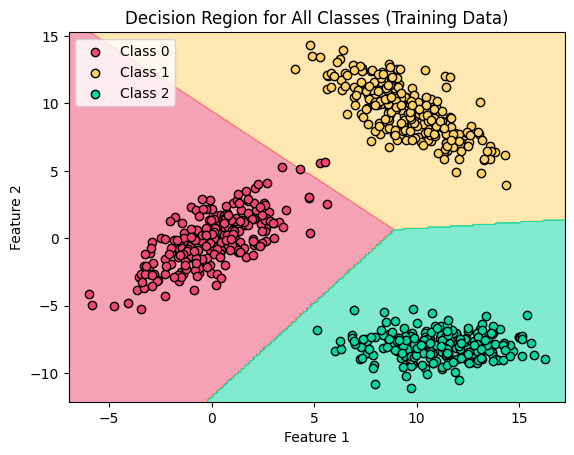

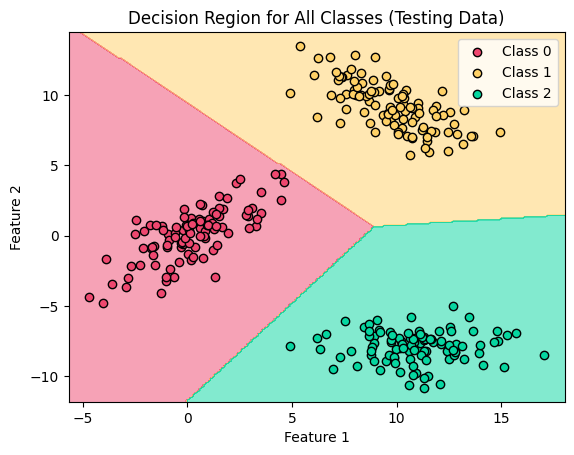

In [ ]:

def plot_decision_region_bayes_123(X, y, mean_vectors, cov_matrices, choice):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid using mean-based classification
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = [bayes_classifier(datapoint, mean_vectors[0], cov_matrices[0], mean_vectors[1], cov_matrices[1], mean_vectors[2], cov_matrices[2]) for datapoint in mesh_data]
    mesh_labels = np.array(mesh_labels).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)
    unique_classes = np.unique(y)

    # Plot each class separately with a different label
    for class_label in unique_classes:
        # Filter the points for the current class
        class_points = X[y == class_label]

        # Plot the points for the current class with a label
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],
                    c=custom_cmap(class_label), label=f'Class {class_label}', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if choice:
        plt.title('Decision Region for All Classes (Training Data)')
    else:
        plt.title('Decision Region for All Classes (Testing Data)')
    plt.legend()
    plt.show()

# Call the function to plot decision region for all classes
plot_decision_region_bayes_123(X_train, y_train, mean_vectors, cov_mat_0, True)
plot_decision_region_bayes_123(X_test, y_test, mean_vectors, cov_mat_0, False)

###Case 2 - Full covariance matrix for all the classes and is same for all the classes


####*1) Same covariance matrix for all the classes obtained by taking average of covariance matrices of all the classes*

#####Model

In [ ]:
cov_mat1 = (cov_matrices[0]+cov_matrices[1]+cov_matrices[2])/3
covariance_class_1 = cov_mat1
covariance_class_2 = cov_mat1
covariance_class_3 = cov_mat1

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2, mean_class_3, covariance_class_3) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Compute mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)
# Compute confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions, normalize='true') * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix)

Test Accuracy: 1.0
Precision per class: [1. 1. 1.]
Recall per class: [1. 1. 1.]
F1-score per class: [1. 1. 1.]
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0
Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


#####Decision Boundary Plots





######Pairwise Classes

<ipython-input-39-240a514f258b>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0],
<ipython-input-39-240a514f258b>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0],


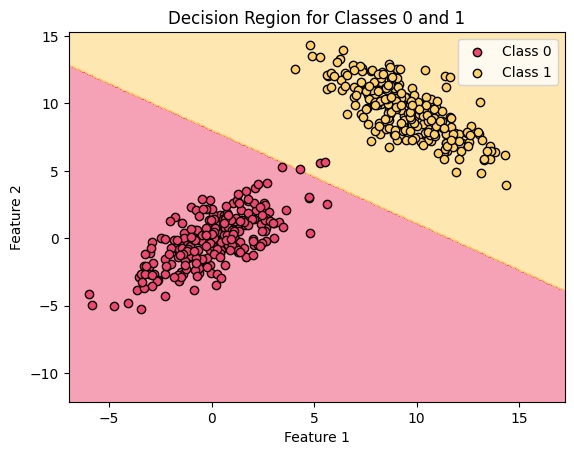

<ipython-input-39-240a514f258b>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class2]).iloc[:, 0],
<ipython-input-39-240a514f258b>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


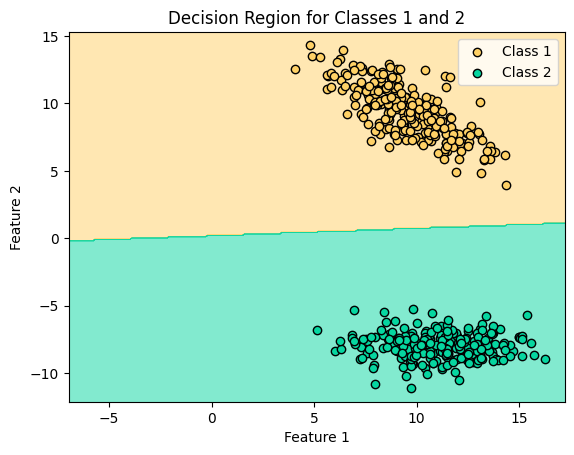

<ipython-input-39-240a514f258b>:90: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class1]).iloc[:, 0],
<ipython-input-39-240a514f258b>:95: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((X_train[y_train == class3]).iloc[:, 0],


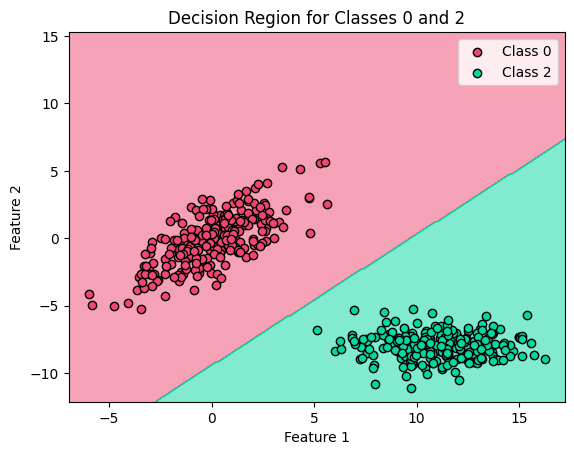

<ipython-input-40-e946d9717b0b>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1],


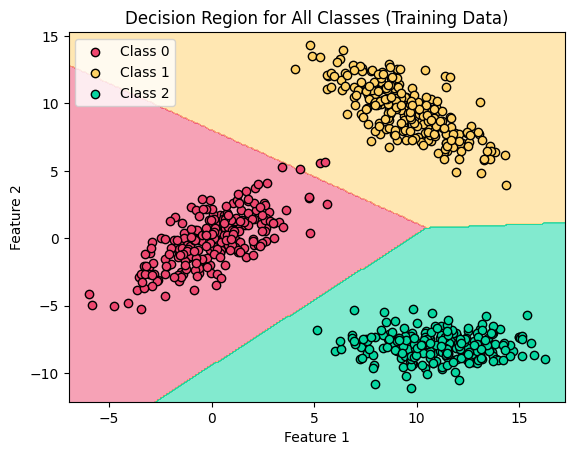

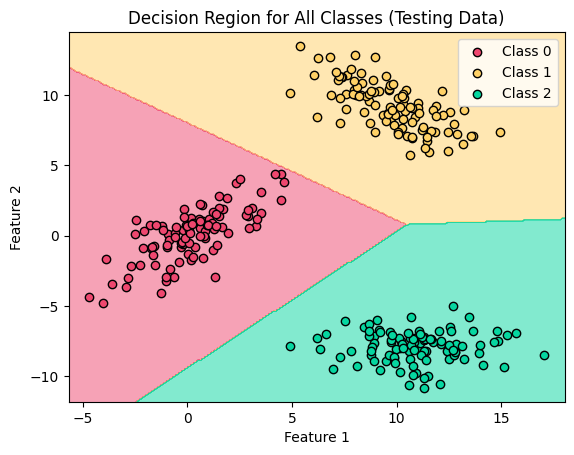

In [ ]:
cov_mat_1 = {
    0: covariance_class_1,
    1: covariance_class_2,
    2: covariance_class_3
}
plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_mat_1, class1=0, class2=1)
plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_mat_1, class2=1, class3=2)
plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_mat_1, class1=0, class3=2)


######All Classes

In [ ]:
plot_decision_region_bayes_123(X_train, y_train, mean_vectors, cov_mat_1, True)
plot_decision_region_bayes_123(X_test, y_test, mean_vectors, cov_mat_1, False)

####*2) Same covariance matrix for all the classes by computing the covariance matrix of training data of all the classes combined.*

#####Model

In [ ]:
combined_df = pd.concat([Xtrain, ytrain], axis=1)
features = combined_df[['Feature 1', 'Feature 2']].values
covariance_combined = np.cov(features, rowvar=False)
covariance_class_1 = covariance_combined
covariance_class_2 = covariance_combined
covariance_class_3 = covariance_combined
predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2, mean_class_3, covariance_class_3) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Compute mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)
# Compute confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions, normalize='true') * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix)

Test Accuracy: 1.0
Precision per class: [1. 1. 1.]
Recall per class: [1. 1. 1.]
F1-score per class: [1. 1. 1.]
Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0
Confusion Matrix (in percentage):
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


#####Decision Boundary Plots

In [ ]:
cov_mat_2 = {
    0: covariance_class_1,
    1: covariance_class_2,
    2: covariance_class_3
}
plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_mat_2, class1=0, class2=1)
plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_mat_2, class2=1, class3=2)
plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_mat_2, class1=0, class3=2)
plot_decision_region_bayes_123(X_train, y_train, mean_vectors, cov_mat_2, True)
plot_decision_region_bayes_123(X_test, y_test, mean_vectors, cov_mat_2, False)

###Case 3 - Covariance matrix is diagonal and is different for each class

####Model

In [ ]:
covariance_class_1 = [[cov_matrices[0][0][0], 0], [0, cov_matrices[0][1][1]]]
covariance_class_2 = [[cov_matrices[1][0][0], 0], [0, cov_matrices[1][1][1]]]
covariance_class_3 = [[cov_matrices[2][0][0], 0], [0, cov_matrices[2][1][1]]]

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2, mean_class_3, covariance_class_3) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Compute mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)
# Compute confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions, normalize='true') * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix)

####Decision Boundary Plots

#####Pairwise Classes

In [ ]:
cov_mat_3 = {
    0: covariance_class_1,
    1: covariance_class_2,
    2: covariance_class_3
}
plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_mat_3, class1=0, class2=1)
plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_mat_3, class2=1, class3=2)
plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_mat_3, class1=0, class3=2)


#####All Classes

In [ ]:
plot_decision_region_bayes_123(X_train, y_train, mean_vectors, cov_mat_3, True)
plot_decision_region_bayes_123(X_test, y_test, mean_vectors, cov_mat_3, False)

###Case 4 - Full covariance matrix for each class and is different

####Model

In [ ]:
covariance_class_1 = cov_matrices[0]
covariance_class_2 = cov_matrices[1]
covariance_class_3 = cov_matrices[2]

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2, mean_class_3, covariance_class_3) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Compute mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)
# Compute confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions, normalize='true') * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix)

####Decision Boundary Plots



#####Pairwise Classes

In [ ]:
cov_mat_4 = {
    0: covariance_class_1,
    1: covariance_class_2,
    2: covariance_class_3
}
plot_decision_region_bayes_12(X_train, y_train, mean_vectors, cov_mat_4, class1=0, class2=1)
plot_decision_region_bayes_23(X_train, y_train, mean_vectors, cov_mat_4, class2=1, class3=2)
plot_decision_region_bayes_13(X_train, y_train, mean_vectors, cov_mat_4, class1=0, class3=2)


In [ ]:
plot_decision_region_bayes_123(X_train, y_train, mean_vectors, cov_mat_4, True)
plot_decision_region_bayes_123(X_test, y_test, mean_vectors, cov_mat_4, False)